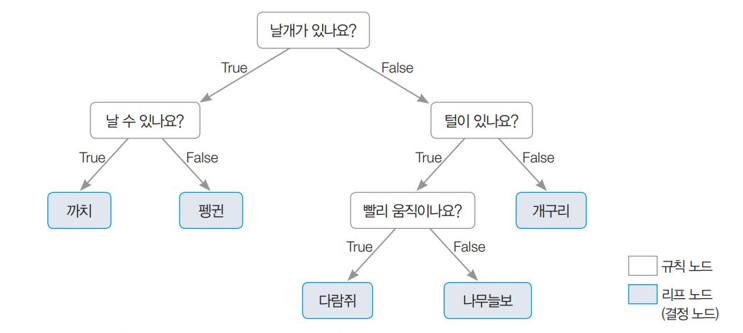

정보이득 : 엔트로피 개념
  - 엔트로피 : 데이터 집합의 혼잡도
    - 데이터집합에 다른 데이터를 추가-> 균일도가 떨어짐 -> 혼잡도가 높아진고 엔트로피는 높아짐
    - 데이터집합에 같은 데이터를 추가-> 균일도가 높아짐 -> 혼잡도가 떨어지고 엔트로피는 낮아짐
  - 정보이득지수: 혼잡도가 줄어들어 얻게 되는 이득 (1-엔트로피)
  - 결정트리 : 정보이득지수가 높은 피처를 분할 기준

지니계수
  - 경제학용어:소득불균형을나타냄,
  - 지니계수가 높을수도록 순도가 낮은 데이터
  - 지니계수가 0이면 완전 순수한 데이터 집합
  - 결정트리 : 지니계수가 낮은 피처를 분할 기준으로 사용

# 주요파라메터
  - min_samples_plit : 노드분할을 위한 최소 샘플데이터 수
  - min_sample_leaf : 리프노드가 되기 위한 최소 샘플 데이터 ㅅ ㅜ
  - max_features : 최대 피처수
  - max_depth : 트리의 최대 높이
  - max_deaf_nodes : 리프 노드에 들어가는 최대 셈플수

In [10]:
# https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

In [11]:
!unzip /content/drive/MyDrive/data/uci/human+activity+recognition+using+smartphones.zip -d data

Archive:  /content/drive/MyDrive/data/uci/human+activity+recognition+using+smartphones.zip
replace data/UCI HAR Dataset.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: data/UCI HAR Dataset.names  
 extracting: data/UCI HAR Dataset.zip  


In [12]:
!unzip '/content/data/UCI HAR Dataset.zip' -d data

Archive:  /content/data/UCI HAR Dataset.zip
replace data/UCI HAR Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/UCI HAR Dataset/.DS_Store  
  inflating: data/__MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: data/UCI HAR Dataset/activity_labels.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: data/UCI HAR Dataset/features.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._features.txt  
  inflating: data/UCI HAR Dataset/features_info.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: data/UCI HAR Dataset/README.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/._README.txt  
  inflating: data/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: data/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt  
  inflating: data/__MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_

In [13]:
import pandas as pd
feature_name_df = pd.read_csv('/content/data/UCI HAR Dataset/features.txt', sep='\s+', header=None,names=['index','feature_name'])
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [33]:
X_train = pd.read_csv('/content/data/UCI HAR Dataset/train/X_train.txt',sep='\s+',header=None)
y_train = pd.read_csv('/content/data/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None)

In [34]:
# feature name 추출
feature_name = feature_name_df.iloc[:,1].to_numpy().tolist()

In [35]:
X_train.shape, y_train.shape, feature_name_df.shape

((7352, 561), (7352, 1), (561, 2))

In [36]:
X_train.columns = feature_name

In [37]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [38]:
X_train['target'] = y_train

In [39]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",target
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


# target 값 시각화

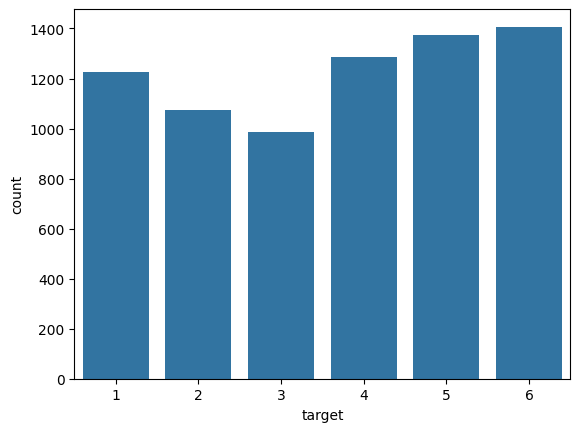

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target',data=X_train)
plt.show()

In [48]:
X_test = pd.read_csv('/content/data/UCI HAR Dataset/test/X_test.txt',sep='\s+',header=None)
X_test.columns = feature_name
y_test = pd.read_csv('/content/data/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None)
X_test['target'] =  y_test
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",target
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5


In [58]:
activity_label = pd.read_csv('/content/data/UCI HAR Dataset/activity_labels.txt',header=None,sep='\s+')

In [59]:
activity_label

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


# 결정트리

In [61]:
# 데이터 분리
X = X_train.drop('target',axis=1).to_numpy()
y = X_train['target'].to_numpy()

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [63]:
dt.fit(X,y)

DecisionTreeClassifier()

In [64]:
# 예측
X_t = X_test.drop('target',axis=1).to_numpy()
y_t = X_test['target'].to_numpy()
y_pred = dt.predict(X_t)

In [81]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print(f"accuracy_score : {accuracy_score(y_t,y_pred)}")

accuracy_score : 0.8649474041398032


In [79]:
import numpy as np
np.unique(y_t)


array([1, 2, 3, 4, 5, 6])

# 현재 모델에 사용한 파라메터

In [82]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [83]:
# 머신러닝에서 성능을 좌우하는 요소
# 1. 가장중요한게..... 데이터의 품질
# 2. 적절한 모델선정
# 3. 모델중에 파라메터의 값을 변경(최적의 파라메터 값을 찾는게)  -- 파라메터 튜닝.... 하이퍼 파라메터

In [87]:
# 학습용
# X,y
# 테스트용
# X_t,y_t
from sklearn.metrics import classification_report
df = DecisionTreeClassifier(random_state=0)
df.fit(X,y)
y_pred = df.predict(X_t)
print(f"accuracy_score : {accuracy_score(y_t,y_pred)}")
print(f"classification_report : {classification_report(y_t,y_pred)}")

accuracy_score : 0.8595181540549711
classification_report :               precision    recall  f1-score   support

           1       0.82      0.90      0.86       496
           2       0.84      0.78      0.81       471
           3       0.87      0.84      0.85       420
           4       0.83      0.76      0.79       491
           5       0.79      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



In [96]:
from sklearn.metrics import classification_report
df = DecisionTreeClassifier(random_state=0, max_depth=10,min_samples_split=20)
df.fit(X,y)
y_pred = df.predict(X_t)
print(f"accuracy_score : {accuracy_score(y_t,y_pred)}")
print(f"classification_report : {classification_report(y_t,y_pred)}")

accuracy_score : 0.8629114353579912
classification_report :               precision    recall  f1-score   support

           1       0.84      0.92      0.88       496
           2       0.84      0.80      0.82       471
           3       0.88      0.83      0.85       420
           4       0.85      0.73      0.79       491
           5       0.78      0.88      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



# 파라메터 튜닝 - 최적의 조합을 찾기